## Natural Language Processing

In [ ]:
#!conda install nltk

In [1]:
import nltk

In [2]:
messages=[i.rstrip() for i in open('smsspamcollection/SMSSpamCollection')]

In [3]:
print (len(messages))

5574


In [4]:
print (messages[:5])

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'ham\tOk lar... Joking wif u oni...', "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'ham\tU dun say so early hor... U c already then say...', "ham\tNah I don't think he goes to usf, he lives around here though"]


***we can tell that it's a tab separated file due to it's structure (\t). 
   So we can specifiy that in pandas.read_csv fn.***

***we can also use 'enumerate' fn to label each line of the file!***

In [5]:
for number,message in enumerate(messages[:5]):
    print (number,message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though


***Training Phase: we will convert these texts into feature vectors for the machine learning algo (develop a predictive model).***

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [7]:
messages=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t')

In [8]:
messages.head()

ham  \
0   ham   
1  spam   
2   ham   
3   ham   
4  spam   

  Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  
0                      Ok lar... Joking wif u oni...                                                               
1  Free entry in 2 a wkly comp to win FA Cup fina...                                                               
2  U dun say so early hor... U c already then say...                                                               
3  Nah I don't think he goes to usf, he lives aro...                                                               
4  FreeMsg Hey there darling it's been 3 week's n...

In [9]:
messages=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [10]:
messages.head()

label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [12]:
messages.describe()

label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30

In [13]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [14]:
messages['char_length']=messages['message'].apply(len)

In [15]:
messages.head()

label                                            message  char_length
0   ham  Go until jurong point, crazy.. Available only ...          111
1   ham                      Ok lar... Joking wif u oni...           29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          155
3   ham  U dun say so early hor... U c already then say...           49
4   ham  Nah I don't think he goes to usf, he lives aro...           61

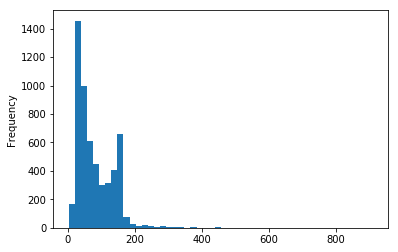

In [16]:
messages['char_length'].plot(bins=50,kind='hist')

In [17]:
messages['char_length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: char_length, dtype: float64

***Let's locate the message that has 910 characters.***

In [18]:
messages[messages['char_length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a0ceea4a8>,
      dtype=object)

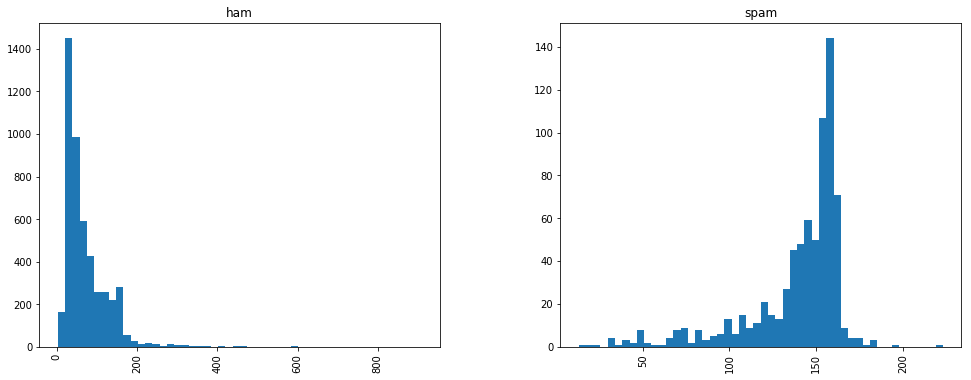

In [19]:
messages.hist(column='char_length',
              by='label',
             bins=50,
             figsize=(16,6))

***ham histogram is screwed by the message with 910 characters.***

In [20]:
from wordcloud import WordCloud

In [21]:
def visualize(i):
  words = ''
  for msg in messages[messages['label'] == i]['message']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

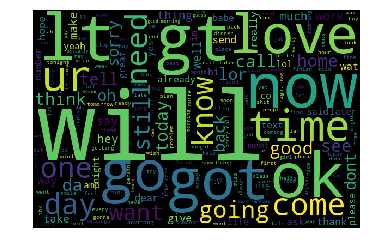

In [22]:
visualize('ham')

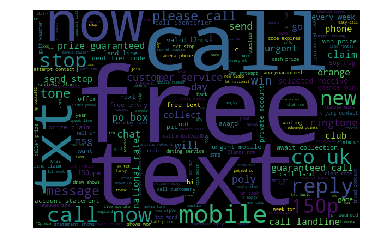

In [23]:
visualize('spam')

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [25]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(messages['message'])

In [26]:
X

<5572x8713 sparse matrix of type '<class 'numpy.int64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [27]:
messages['label']

0        ham
1        ham
2       spam
3        ham
4        ham
5       spam
6        ham
7        ham
8       spam
9       spam
10       ham
11      spam
12      spam
13       ham
14       ham
15      spam
16       ham
17       ham
18       ham
19      spam
20       ham
21       ham
22       ham
23       ham
24       ham
25       ham
26       ham
27       ham
28       ham
29       ham
        ... 
5542     ham
5543     ham
5544     ham
5545     ham
5546     ham
5547    spam
5548     ham
5549     ham
5550     ham
5551     ham
5552     ham
5553     ham
5554     ham
5555     ham
5556     ham
5557     ham
5558     ham
5559     ham
5560     ham
5561     ham
5562     ham
5563     ham
5564     ham
5565     ham
5566    spam
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [28]:
# Since we are trying to classify whether the phone messages are ham or spam, it's a binary classification. 
# So we need to perform a binary encoding.
messages['label_'] = messages['label'].map({'ham': 0, 'spam': 1})
messages['label_']

0       0
1       0
2       1
3       0
4       0
5       1
6       0
7       0
8       1
9       1
10      0
11      1
12      1
13      0
14      0
15      1
16      0
17      0
18      0
19      1
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
5542    0
5543    0
5544    0
5545    0
5546    0
5547    1
5548    0
5549    0
5550    0
5551    0
5552    0
5553    0
5554    0
5555    0
5556    0
5557    0
5558    0
5559    0
5560    0
5561    0
5562    0
5563    0
5564    0
5565    0
5566    1
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label_, Length: 5572, dtype: int64

In [29]:
y = messages['label_'].as_matrix()
y

array([0, 0, 1, ..., 0, 0, 0])

In [30]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

***Training Phase***

In [32]:
# Let's choose multinomial naive bayes for the model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
print("Training:", model.score(X_train, y_train))


Training: 0.9937177473636976


***Testing Phase***

In [34]:
print("Testing:", model.score(X_test, y_test))

Testing: 0.97847533632287


In [35]:
messages['predict']=model.predict(X)

In [36]:
messages['predict']

0       0
1       0
2       1
3       0
4       0
5       0
6       0
7       0
8       1
9       1
10      0
11      1
12      1
13      0
14      0
15      1
16      0
17      0
18      0
19      1
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
5542    0
5543    0
5544    0
5545    0
5546    0
5547    1
5548    0
5549    0
5550    0
5551    0
5552    0
5553    0
5554    0
5555    0
5556    0
5557    0
5558    0
5559    0
5560    0
5561    0
5562    0
5563    0
5564    0
5565    0
5566    1
5567    1
5568    0
5569    0
5570    0
5571    0
Name: predict, Length: 5572, dtype: int64

In [37]:
messages

label                                            message  char_length  \
0      ham  Go until jurong point, crazy.. Available only ...          111   
1      ham                      Ok lar... Joking wif u oni...           29   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...          155   
3      ham  U dun say so early hor... U c already then say...           49   
4      ham  Nah I don't think he goes to usf, he lives aro...           61   
5     spam  FreeMsg Hey there darling it's been 3 week's n...          147   
6      ham  Even my brother is not like to speak with me. ...           77   
7      ham  As per your request 'Melle Melle (Oru Minnamin...          160   
8     spam  WINNER!! As a valued network customer you have...          157   
9     spam  Had your mobile 11 months or more? U R entitle...          154   
10     ham  I'm gonna be home soon and i don't want to tal...          109   
11    spam  SIX chances to win CASH! From 100 to 20,000 po...          136   
12    spam  URGENT! You have won a 1 week FREE membership ...          155   
13     ham  I've been searching for the right words to tha...          196   
14     ham                I HAVE A DATE ON SUNDAY WITH WILL!!           35   
15    spam  XXXMobileMovieClub: To use your credit, click ...          149   
16     ham                         Oh k...i'm watching here:)           26   
17     ham  Eh u remember how 2 spell his name... Yes i di...           81   
18     ham  Fine if thats the way u feel. Thats the way ...           56   
19    spam  England v Macedonia - dont miss the goals/team...          155   
20     ham          Is that seriously how you spell his name?           41   
21     ham    I‘m going to try for 2 months ha ha only joking           47   
22     ham  So ü pay first lar... Then when is da stock co...           52   
23     ham  Aft i finish my lunch then i go str down lor. ...           88   
24     ham  Ffffffffff. Alright no way I can meet up with ...           57   
25     ham  Just forced myself to eat a slice. I'm really ...          144   
26     ham                     Lol your always so convincing.           30   
27     ham  Did you catch the bus ? Are you frying an egg ...          134   
28     ham  I'm back &amp; we're packing the car now, I'll...           75   
29     ham  Ahhh. Work. I vaguely remember that! What does...           64   
...    ...                                                ...          ...   
5542   ham           Armand says get your ass over to epsilon           40   
5543   ham             U still havent got urself a jacket ah?           38   
5544   ham  I'm taking derek &amp; taylor to walmart, if I...          154   
5545   ham      Hi its in durban are you still on this number           45   
5546   ham         Ic. There are a lotta childporn cars then.           42   
5547  spam  Had your contract mobile 11 Mnths? Latest Moto...          160   
5548   ham                 No, I was trying it all weekend ;V           34   
5549   ham  You know, wot people wear. T shirts, jumpers, ...           87   
5550   ham        Cool, what time you think you can get here?           43   
5551   ham  Wen did you get so spiritual and deep. That's ...           51   
5552   ham  Have a safe trip to Nigeria. Wish you happines...           91   
5553   ham                        Hahaha..use your brain dear           27   
5554   ham  Well keep in mind I've only got enough gas for...           98   
5555   ham  Yeh. Indians was nice. Tho it did kane me off ...          153   
5556   ham  Yes i have. So that's why u texted. Pshew...mi...           63   
5557   ham  No. I meant the calculation is the same. That ...          273   
5558   ham                             Sorry, I'll call later           22   
5559   ham  if you aren't here in the next  &lt;#&gt;  hou...           66   
5560   ham                  Anything lor. Juz both of us lor.           33   
5561   ham  Get me out of t

***Some of the messages, such as the 6th message, should be  SPAM messages but our model predicted that the outcome to be ham messages.***

***So we should examine further.***

In [39]:
#let's take a look at these incorrect classification of messages
#(should be spam but it's predicted as ham!)

false_ham = messages[(messages['predict'] == 0) & (messages['label_'] == 1)]['message']
for msg in false_ham:
    print(msg)
    print('\n')


FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


Did you hear about the new "Divorce Barbie"? It comes with all of Ken's stuff!


Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?


Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r


Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Calls£1/minmoremobsEMSPOBox45PO139WA


Would you like to see my XXX pics they are so hot they were nearly banned in the uk!


Hi ya babe x u 4goten bout me?' scammers getting smart..Though this is a regular vodafone no, if you respond you get further prem rate msg/subscription. Other nos used also. Beware!


Babe: U want me dont u baby! Im nasty and have a thing 4 filthyguys. Fancy a rude time with a sexy bitch. H

In [40]:
#let's take a look at these incorrect classification of messages
#(should be ham but it's predicted as spam!)

false_spam = messages[(messages['predict'] == 1) & (messages['label_'] == 0)]['message']
for msg_ in false_spam:
    print(msg_)
    print('\n')


Finally the match heading towards draw as your prediction.


Waiting for your call.


Yun ah.the ubi one say if ü wan call by tomorrow.call 67441233 look for irene.ere only got bus8,22,65,61,66,382. Ubi cres,ubi tech park.6ph for 1st 5wkg days.èn


Hello-/@drivby-:0quit edrunk sorry iff pthis makes no senrd-dnot no how ^ dancce 2 drum n basq!ihave fun 2nhite x ros xxxxxxx


We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us


Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May


Total video converter free download type this in google search:)


Ambrith..madurai..met u in arun dha marrge..remembr?


V-aluable. A-ffectionate. L-oveable. E-ternal. N-oble. T-ruthful. I-ntimate. N-atural. E-namous. Happy "VALENTINES DAY" in advance


Tiwary to rcb.battle between bang and kochi.


Mostly sports type..lyk footbl,crckt..


Brainless Baby Doll..:-D;-), vehicle sariyag drive madoke barolla..


Also andros ice etc etc


life alle m

## HOPEFULLY, you coded along and had fun analyzing these messages! 

## I sure DID! ;-)